In [1]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [2]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 100,
    'n_epoch': 10,
    'lr': 0.05,
    'verbose': False,
    'eval_freq': 500,
    'batch_size': 128,
    'split': 0.8,
    'log': False,
    'action_dim': 1
}

policy_cfg = {
    'timesteps': 1000,
    'verbose': False,
    'algo': 'ppo', # not used atm
    'log': False,
    'action_dim': 1
}

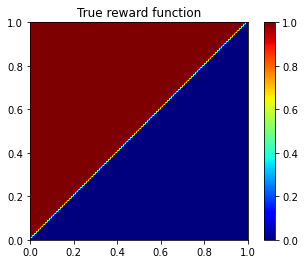

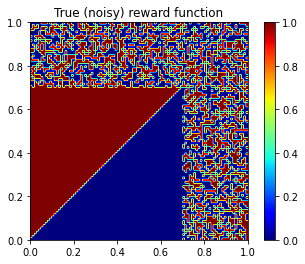

In [3]:
## Setup

iterations = 10

# Create comparison function
f = lambda x: x[0]
var_1, var_2 = 0.00, 100
reward_fn_true = lambda x : f(x)
seed = None
np.random.seed(seed)
noise_fn = lambda x: step_noise(x[0], x_step=0.7, var_1=var_1, var_2=var_2, seed=seed)
reward_fn_true_noisy = create_reward_fn_1(f, noise_fn, seed=seed)
comparison_fn = create_comparison_fn_1(f, noise_fn, seed=seed)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(0, 1, size=(1,)) for _ in range(n)])

# Plot true reward function
vis_fn = lambda fn, title: visualize_fn_1(fn, title=title, x_range=[0,1], x_step=0.01)
vis_fn(reward_fn_true, title="True reward function")
vis_fn(reward_fn_true_noisy, title="True (noisy) reward function")

In [4]:
## Run feedback loop

comparisons_data = None
samples = {}
reward_fns = {}

for i in range(iterations):
    print(f"Iteration {i}")
    # Learn reward function from samples and feedback from comparison function
    reward_fn, comparisons_data = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg, prev_comparisons=comparisons_data)
    
    # Train policy on reward function and return sampler
    sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store sampler and reward function
    samples[i] = sample
    reward_fns[i] = reward_fn

    # plot_sampler_1(samples[i], title=str(i), n=1000)
    # vis_fn(reward_fns[i], title=str(i))

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8


In [ ]:
# Visualize results

visualize_res_1(reward_fns, samples)